In [1]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

N = 125
A = 1
R = 0
M = 1
q = 0.02

tranches = [[1,3],[4, 6],[7,125]]

def p(M, rho, lims):
    qM = norm.cdf((norm.ppf(q)-np.sqrt(rho)*M)/(np.sqrt(1-rho)))
    pN = binom(N, qM)
    prob = (lims[1]-lims[0]+1) * (pN.cdf(N) - pN.cdf(lims[1]-1))
    for i in range(lims[0], lims[1]):
        prob += (i-lims[0]+1)*pN.pmf(i)        
    return norm.pdf(M)*prob

res = [[],[],[]]
for i in range(len(tranches)):
    for rho in np.arange(0., 1.05, 0.05):
        if rho == 1.0:
            rho = 0.99
        v = quad(p, -np.inf, np.inf, args=(rho, tranches[i]))
        res[i].append(v[0])

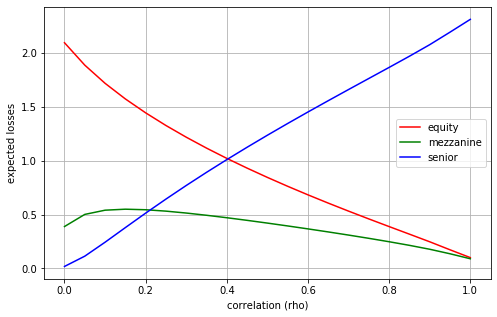

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 1.05, 0.05), res[0], label="equity", color='red')
plt.plot(np.arange(0, 1.05, 0.05), res[1], label="mezzanine", color='green')
plt.plot(np.arange(0, 1.05, 0.05), res[2], label="senior", color='blue')
plt.grid(True)
plt.xlabel("correlation (rho)")
plt.ylabel("expected losses")
plt.legend()
plt.show()

In [31]:
print (res[0][5] + res[1][5] + res[2][5])
print (res[0][10] + res[1][10] + res[2][10])
print (res[0][15] + res[1][15] + res[2][15])

2.4999999999999725
2.499999999999975
2.4999999999999774


In [4]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

N = 125
A = 1
R = 0
M = 1
q = 0.02

tranches = [[1,3],[4, 6],[7,9]]

def p(M, rho, lims):
    qM = norm.cdf((norm.ppf(q)-np.sqrt(rho)*M)/(np.sqrt(1-rho)))
    pN = binom(N, qM)
    prob = (lims[1]-lims[0]+1) * (pN.cdf(N) - pN.cdf(lims[1]-1))
    for i in range(lims[0], lims[1]):
        prob += (i-lims[0]+1)*pN.pmf(i)        
    return norm.pdf(M)*prob

res = [[],[],[]]
for i in range(len(tranches)):
    for rho in np.arange(0., 1.05, 0.05):
        if rho == 1.0:
            rho = 0.99
        v = quad(p, -np.inf, np.inf, args=(rho, tranches[i]))
        res[i].append(v[0])

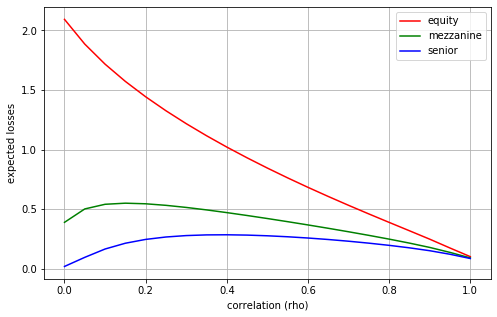

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 1.05, 0.05), res[0], label="equity", color='red')
plt.plot(np.arange(0, 1.05, 0.05), res[1], label="mezzanine", color='green')
plt.plot(np.arange(0, 1.05, 0.05), res[2], label="senior", color='blue')
plt.grid(True)
plt.xlabel("correlation (rho)")
plt.ylabel("expected losses")
plt.legend()
plt.show()

In [55]:
N=10
# probabilities of default of the each name
q = [0.01, 0.02, 0.15, 0.22, 0.03, 0.01, 0.024, 0.008, 0.015, 0.04]
# p[k] probability of k defaults
p = [0 for _ in range(0, N+1)]
p[0] = (1-q[0])
p[1] = q[0]

for i in range(2, N+1):
    for j in range(1, i+1):
        p[j] = p[j-1]*q[i-1] + p[j]*(1-q[i-1])
    p[0] = p[0]*(1-q[i-1])
    
print (p)

[0.5655235318063276, 0.350403844356834, 0.11955743831716371, 0.03306691281696737, 0.007898676408014359, 0.0008119173181899153, 5.3505698491409986e-05, 2.8142380742779974e-06, 1.2554827537575903e-07, 5.2166123010999485e-09, 2.0866449204399796e-10]


In [51]:
a = 10
b = 1
c = 5

def func(x):
    return a*x**2 + b*x + c
    
def runner(f, x):
    return f(x)*2

print (runner(func, 2))

94


In [54]:
def func2(x, a, b, c):
    return a*x**2 + b*x + c
    
def runner(f, x, args=()):
    return f(x, *args)*2

a = 10
b = 1
c = 5
print (runner(func, 2))
print (runner(func2, 2, args=(a, b, c)))
print (runner(func2, 2, args=(10, 1, 5)))

94
94
94


In [59]:
def func2(x, a, b, c):
    return a*x**2 + b*x + c
    
def runner(f, x, kwargs={}):
    return f(x, **kwargs)*2

a = 10
b = 1
c = 5
print (runner(func2, 2, kwargs={"a":10, "b":1, "c":5}))

94
